In [5]:
#Instalar paquetes por si no están activos aún
#install.packages("dagitty")
#install.packages("ggplot2")
#install.packages("dplyr")
#install.packages("gridExtra")
#install.packages("broom")
#install.packages("knitr")
#install.packages("xtable")

library(dagitty)
library(ggplot2)
library(dplyr)
library(gridExtra)
library(broom)
library(knitr)
library(xtable)

# Seteamos nuevo directorio
set.seed(123)

In [16]:
setwd("C:/Users/Julio/output")

In [17]:
#Parte1a
Deficiones_conceptuales <- "Confounder: Una variable que afecta tanto al tratamiento como al resultado, creando una asociación espuria. Si no se controla, puede llevar a estimaciones sesgadas del efecto causal.
Collider: Una variable que es afectada tanto por el tratamiento como por el resultado (o variables en el camino causal). Controlar por un colisionador puede introducir sesgo.
Mediator: Una variable que se encuentra en el camino causal entre el tratamiento y el resultado. El tratamiento afecta al mediador, el cual a su vez afecta al resultado"
print(Deficiones_conceptuales)

[1] "Confounder: Una variable que afecta tanto al tratamiento como al resultado, creando una asociación espuria. Si no se controla, puede llevar a estimaciones sesgadas del efecto causal.\nCollider: Una variable que es afectada tanto por el tratamiento como por el resultado (o variables en el camino causal). Controlar por un colisionador puede introducir sesgo.\nMediator: Una variable que se encuentra en el camino causal entre el tratamiento y el resultado. El tratamiento afecta al mediador, el cual a su vez afecta al resultado"


In [1]:
writeLines(Deficiones_conceptuales, "definiciones_conceptuales.md")

ERROR: Error: objeto 'Deficiones_conceptuales' no encontrado


Plot coordinates for graph not supplied! Generating coordinates, see ?coordinates for how to set your own.

Plot coordinates for graph not supplied! Generating coordinates, see ?coordinates for how to set your own.



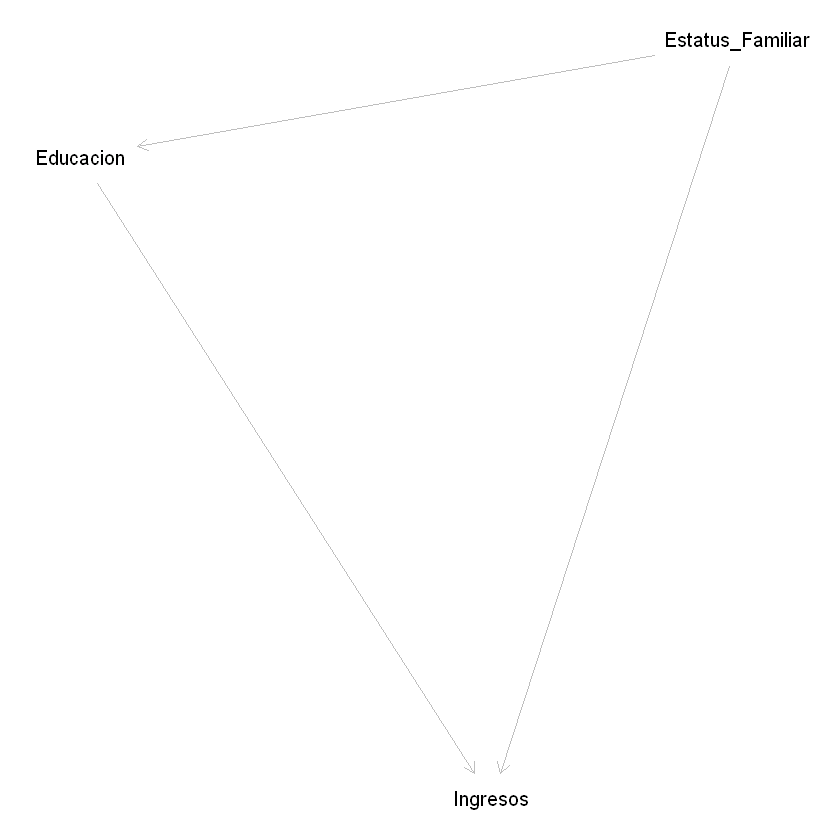

Plot coordinates for graph not supplied! Generating coordinates, see ?coordinates for how to set your own.



pdf 
  2

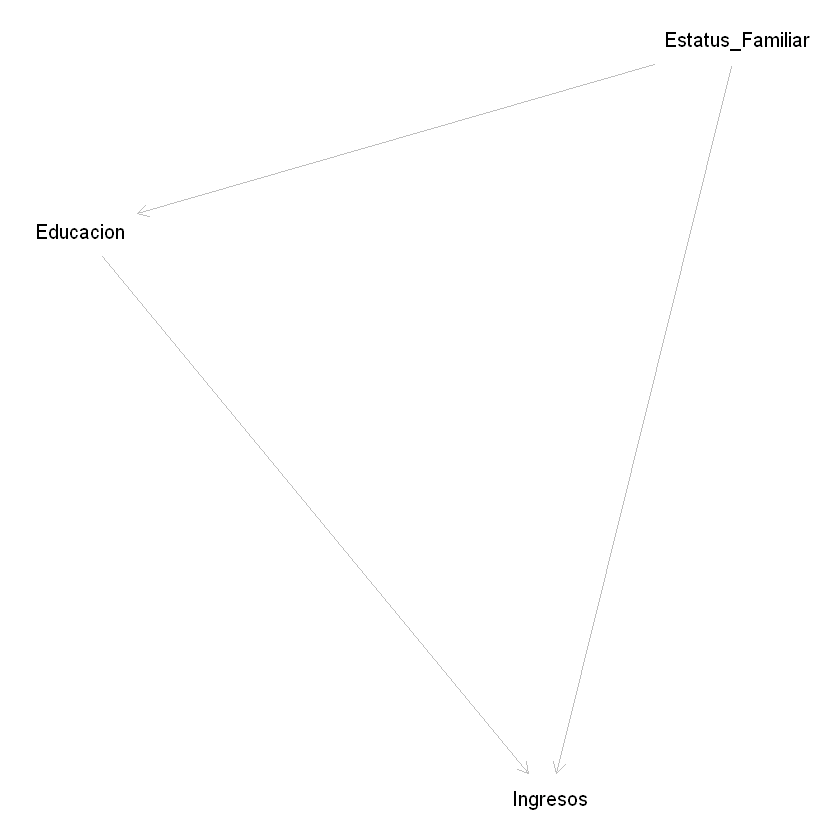

In [25]:
Ej_confuonder <- "Efecto de la Educación en los Ingresos
Tratamiento (X): Años de Educación
Resultado (Y): Ingreso Anual
Variable Confusora (Z): Estatus Socioeconómico Familiar
El origen familiar afecta tanto las oportunidades educativas como el potencial de ingresos"
# Crear DAG para variable confusora
dag_confusor <- dagitty("dag {
    Estatus_Familiar -> Educacion
    Estatus_Familiar -> Ingresos
    Educacion -> Ingresos
}")

# Visualizar y exportar el DAG
plot(dag_confusor, main = "Variable Confusora: Estatus Socioeconómico Familiar")
confuonder_graph <- plot(dag_confusor, main = "Variable Confusora: Estatus Socioeconómico Familiar")

png("confuonder.png", width = 1000, height = 800, res = 120)
plot(dag_confusor, main = "Variable Confusora: Estatus Socioeconómico Familiar")
dev.off()

Plot coordinates for graph not supplied! Generating coordinates, see ?coordinates for how to set your own.

Plot coordinates for graph not supplied! Generating coordinates, see ?coordinates for how to set your own.



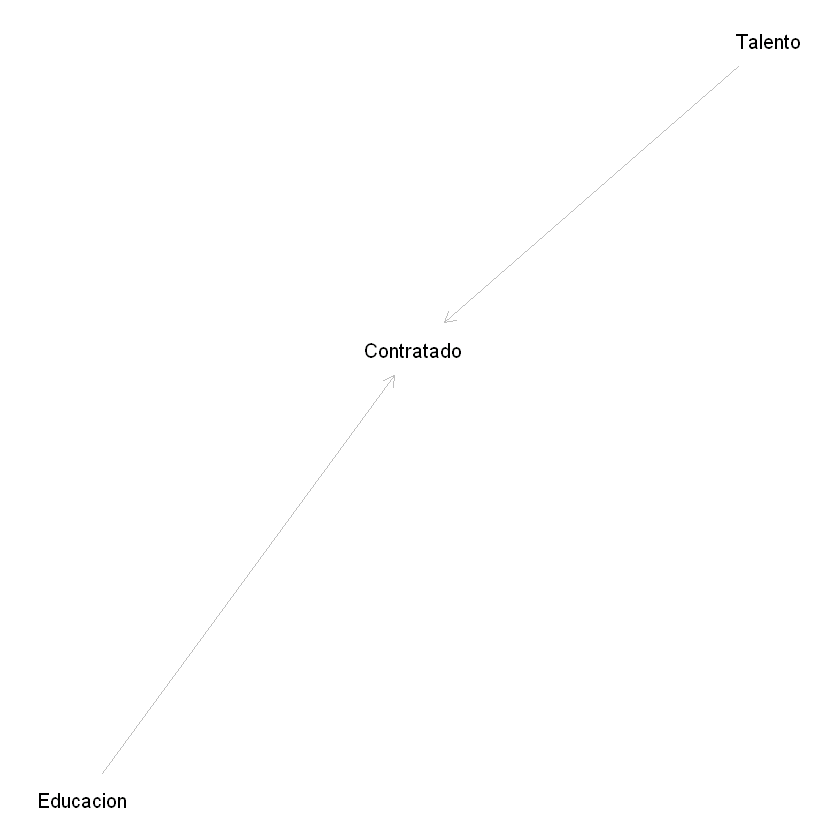

Plot coordinates for graph not supplied! Generating coordinates, see ?coordinates for how to set your own.



pdf 
  2

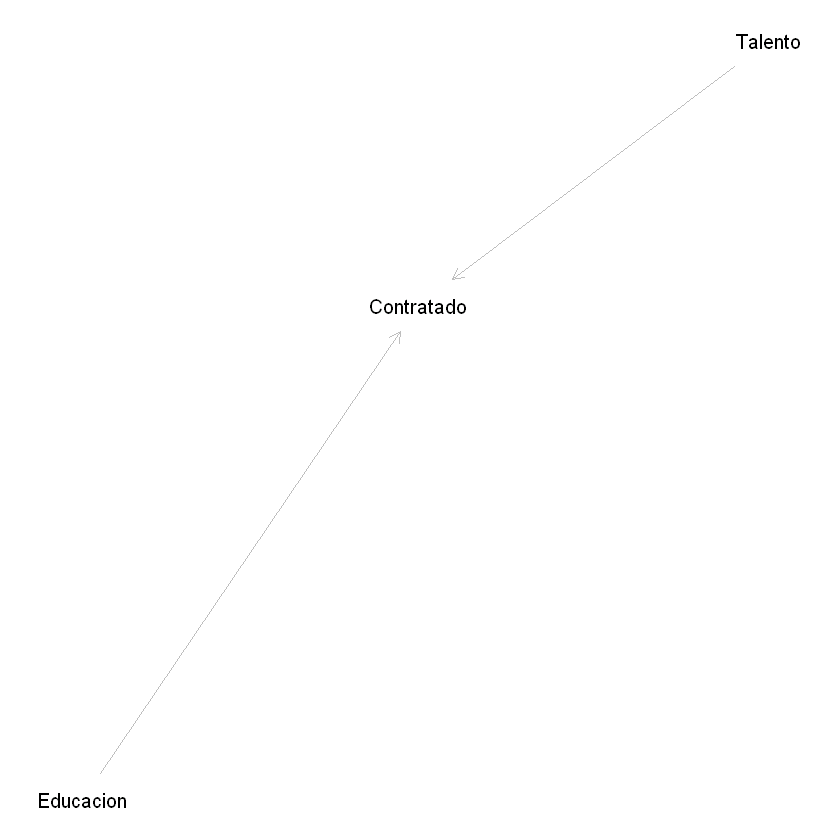

In [29]:
EJ_Collider <- "Talento y Educación en Contratación

Tratamiento (X): Nivel de Educación
Resultado (Y): Talento Natural
Colisionador (Z): Ser Contratado en Empresa Top
Tanto la educación como el talento aumentan las posibilidades de ser contratado"
# Crear DAG para variable colisionadora
dag_collider <- dagitty("dag {
    Educacion -> Contratado
    Talento -> Contratado
}")

# Visualizar y exportar el DAG
plot(dag_collider, main = "Variable Colisionadora: Ser Contratado")
collider_graph <- plot(dag_collider, main = "Variable Colisionadora: Talento y Educación en Contratación")

png("collider.png", width = 1000, height = 800, res = 120)
plot(dag_collider, main = "Variable Colisionadora: Talento y Educación en Contratación")
dev.off()

Plot coordinates for graph not supplied! Generating coordinates, see ?coordinates for how to set your own.

Plot coordinates for graph not supplied! Generating coordinates, see ?coordinates for how to set your own.



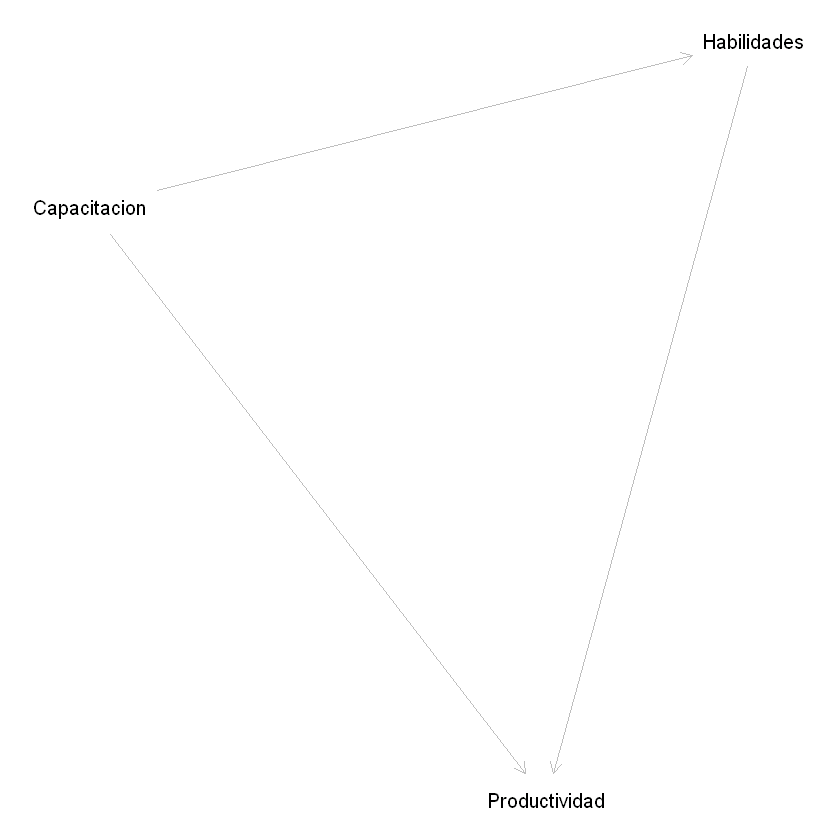

Plot coordinates for graph not supplied! Generating coordinates, see ?coordinates for how to set your own.



pdf 
  2

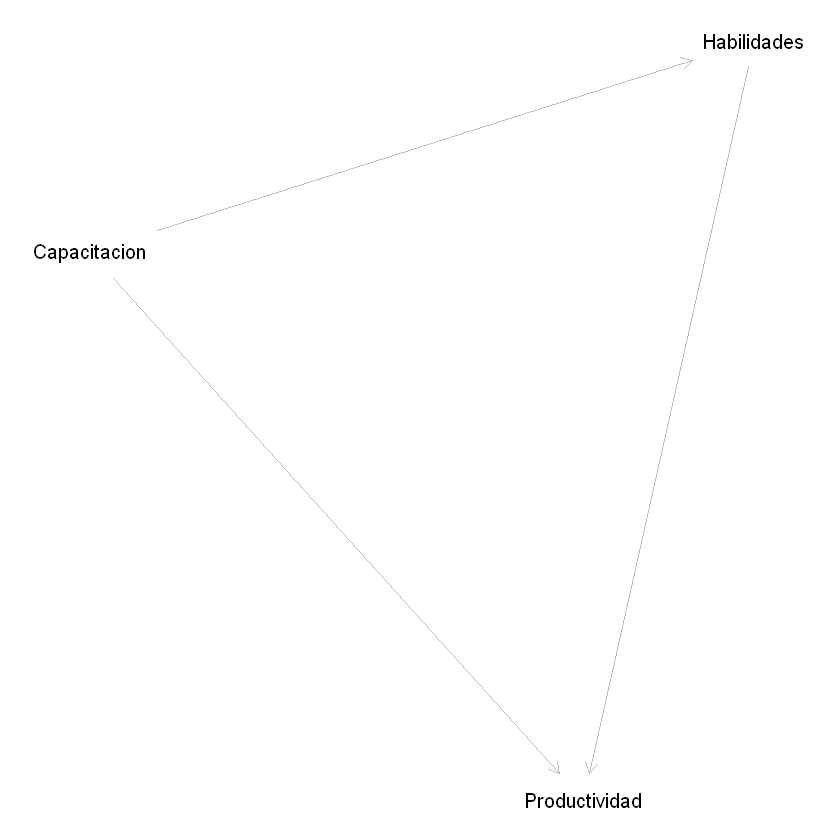

In [30]:
EJ_Mediator <- "Capacitación y Productividad a través de Habilidades

Tratamiento (X): Programa de Capacitación Laboral
Resultado (Y): Productividad del Trabajador
Mediador (Z): Nivel de Habilidades
La capacitación mejora las habilidades, las cuales mejoran la productividad"
# Crear DAG para variable mediadora
dag_mediator <- dagitty("dag {
    Capacitacion -> Habilidades
    Habilidades -> Productividad
    Capacitacion -> Productividad
}")

# Visualizar y exportar el DAG
plot(dag_mediator, main = "Variable Mediadora: Habilidades")
mediator_graph <- plot(dag_mediator, main = "Variable Mediadora: Capacitación y Productividad a través de Habilidades")

png("Mediator.png", width = 1000, height = 800, res = 120)
plot(dag_mediator, main = "Variable Mediadora: Capacitación y Productividad a través de Habilidades")
dev.off()

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


Pendiente Grupo 1: 0.4104152 
Pendiente Grupo 2: 0.4461003 
Pendiente Combinada: -0.3085944 


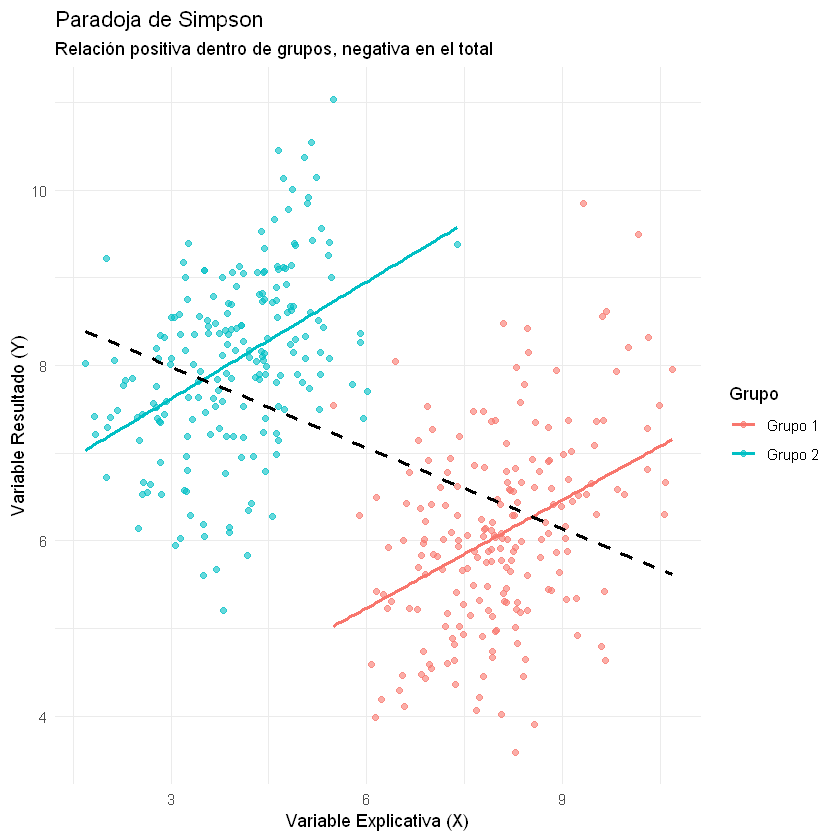

In [34]:
#Parte1b
Paradoja_simpson <- "La Paradoja de Simpson ocurre cuando una tendencia aparece en diferentes grupos de datos pero desaparece o se invierte cuando los grupos se combinan.
Esto sucede debido a la presencia de una variable confusora que afecta tanto a la variable explicativa como al resultado de manera diferente entre grupos."
writeLines(Paradoja_simpson, "Paradoja_simpson.md")
#Simulación de la paradoja
n_por_grupo <- 200  # Número de observaciones por grupo

# Grupo 1: Valores altos de X, relación positiva
grupo1 <- data.frame(
    grupo = "Grupo 1",
    x = rnorm(n_por_grupo, mean = 8, sd = 1),    # X con media alta
    epsilon = rnorm(n_por_grupo, 0, 1)           # Término de error
)
# Y depende positivamente de X dentro del grupo 1
grupo1$y <- 2 + 0.5 * grupo1$x + grupo1$epsilon

# Grupo 2: Valores bajos de X, relación positiva
grupo2 <- data.frame(
    grupo = "Grupo 2", 
    x = rnorm(n_por_grupo, mean = 4, sd = 1),    # X con media baja
    epsilon = rnorm(n_por_grupo, 0, 1)           # Término de error
)
# Y también depende positivamente de X dentro del grupo 2, pero con intercepto más alto
grupo2$y <- 6 + 0.5 * grupo2$x + grupo2$epsilon

# Combinar ambos grupos en un solo dataset
datos_simpson <- rbind(grupo1, grupo2)

# Ajustar líneas de regresión para cada grupo y para el total combinado
modelo_grupo1 <- lm(y ~ x, data = grupo1)      # Regresión solo grupo 1
modelo_grupo2 <- lm(y ~ x, data = grupo2)      # Regresión solo grupo 2
modelo_combinado <- lm(y ~ x, data = datos_simpson)  # Regresión datos combinados

# Crear el gráfico que muestra la paradoja
grafico_simpson <- ggplot(datos_simpson, aes(x = x, y = y, color = grupo)) +
    geom_point(alpha = 0.6) +  # Puntos semitransparentes
    # Líneas de regresión para cada grupo (coloreadas)
    geom_smooth(method = "lm", se = FALSE, aes(color = grupo)) +
    # Línea de regresión para datos combinados (negra discontinua)
    geom_smooth(method = "lm", se = FALSE, color = "black", linetype = "dashed", 
                data = datos_simpson, aes(x = x, y = y)) +
    labs(title = "Paradoja de Simpson",
         subtitle = "Relación positiva dentro de grupos, negativa en el total",
         x = "Variable Explicativa (X)", 
         y = "Variable Resultado (Y)",
         color = "Grupo") +
    theme_minimal()

# Mostrar el gráfico
print(grafico_simpson)

# Imprimir los coeficientes para verificar la paradoja
cat("Pendiente Grupo 1:", coef(modelo_grupo1)[2], "\n")
cat("Pendiente Grupo 2:", coef(modelo_grupo2)[2], "\n") 
cat("Pendiente Combinada:", coef(modelo_combinado)[2], "\n")
#El cambio en las pendientes muestra claramente como las tendencias se pierden al combinar los grupos.